<a href="https://colab.research.google.com/github/SenaKymk/pupilica_ai_bootcamp_assignment/blob/main/frozenLakeQlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
pip install gym

In [31]:
import matplotlib.pyplot as plt
import gym
import numpy as np
from IPython.display import clear_output
import random




*   Gym kütüphanesinden FrozenLake ortamını başlatır.

*   is_slippery=False → deterministik, buz kaymıyor



In [32]:
environment =gym.make("FrozenLake-v1", is_slippery =False)
environment.reset()

0



*   **environment.observation_space →** Ortamın kaç farklı durum (state) olduğunu söyler. 4x4= 16 farklı kare vardır
* **environment.action_space →** Ortamın kaç farklı aksiyon (action) olduğunu söyler.Her durumda 4 aksiyon seçebilirsin:

0: Sol (Left)

1: Aşağı (Down)

2: Sağ (Right)

3: Yukarı (Up)

* **Q-table**, her durum için her aksiyonun beklenen toplam ödülünü saklayan tablo.
Boyutu= (durum sayısı) x (aksiyon sayısı)Öğrenme sürecinde (Q-learning güncellemeleriyle), Q-table’daki 0 lar keşfettikçe değişir.


In [42]:
nb_states = environment.observation_space.n
nb_actions = environment.action_space.n
qtable =np.zeros((nb_states, nb_actions))

**episodes:** kaç kez deneyecek.

**alpha:** ne kadar hızlı öğreniyor (0.5 → ortalama hız).

**gamma:** gelecekteki ödüller ne kadar önemli (0.9 → çok önemli!).

In [34]:
episodes =500
alpha = 0.5
gamma = 0.9
outcomes=[]
print(f"q table before training:{qtable}")

q table before training:[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


**Bu kısım, 500 bölüm boyunca (episodes=500) ortamı deneyip Q-table’ı güncelliyor.**

**Amaç:** Her bölümde doğru yolda nasıl gidileceğini öğrenmek ve Q-table’ı doldurmak

In [36]:
for episode in range(episodes):
    state = environment.reset() #Ortamı sıfırlar, ilk kare (S) olarak başlatır.
    done = False  # Ekle
    outcomes.append("failure")  # Başlangıçta başarısızlık varsay

    while not done: # Hedefe varılana veya deliğe düşünceye kadar adım at.

        if np.max(qtable[state]) == 0: #Eğer o karede hiç bilgi yoksa : rastgele hareket et
            action = environment.action_space.sample()

        #Eğer daha önce denendi ve Q-tableda bilgi varsaen yüksek Q değeri olan aksiyonu seç
        else:
            action = np.argmax(qtable[state])

        done = bool(done)   # numpy.bool8 hatasına karşı önlem
        new_state, reward, done, info = environment.step(action) #Seçilen aksiyonu uygula, yeni duruma geç
        done = bool(done)


        # Q-table update !! burda hataya göre qtable güncellenir.
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        state = new_state

        if done and reward:

            outcomes.pop()  # Eğer hedefe ulaşmışsan (reward > 0 ve done=True), başarısızlık kaydını sil.Sonra “success” ekle.
            outcomes.append("success")
            break


In [37]:
print()
print(f"q table after training:\n{qtable}")
# q table ın son hali


q table after training:
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.      0.81    0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.225   0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


eğitim sırasında 500 bölüm boyunca başarılı mı, başarısızlık mı olduğunu çubuk grafik (bar plot) olarak çizdirir

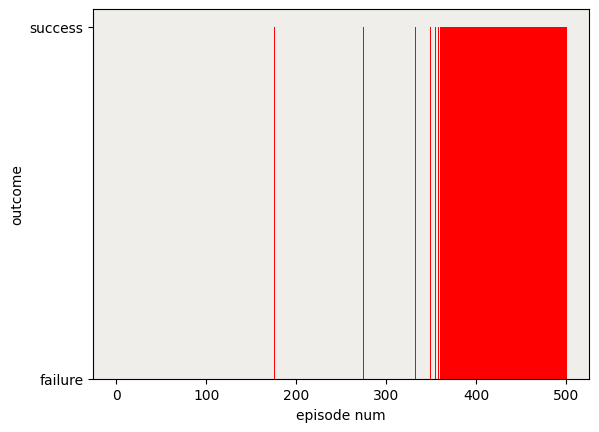

In [38]:
plt.figure()
plt.xlabel("episode num")
plt.ylabel("outcome")
ax= plt.gca()
ax.set_facecolor("#efeeea")
plt.bar(range(len(outcomes)),outcomes, color = "red",width=1)
plt.show()


FrozenLake ortamının haritasını (4x4 ızgarayı) çizip politikayı (hangi karede hangi yönde hareket edileceğini) oklarla görselleştiriyor.

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_frozenlake(env, policy=None):
    grid_size = int(np.sqrt(env.observation_space.n))
    grid = np.zeros((grid_size, grid_size))
    directions = ['←', '↓', '→', '↑']

    fig, ax = plt.subplots()
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)

    for state in range(env.observation_space.n):
        row = state // grid_size
        col = state % grid_size

        desc = env.unwrapped.desc[row][col].decode('utf-8')

        # Kareyi boyayalım
        if desc == 'S':
            color = 'green'
        elif desc == 'H':
            color = 'black'
        elif desc == 'G':
            color = 'gold'
        else:
            color = 'skyblue'

        rect = plt.Rectangle((col, grid_size - row - 1), 1, 1, facecolor=color, edgecolor='gray')
        ax.add_patch(rect)

        # Politika oku
        if policy is not None:
            action = policy[state]
            ax.text(col+0.5, grid_size-row-0.5, directions[action], ha='center', va='center', color='white', fontsize=20)

    plt.grid(True)
    plt.show()


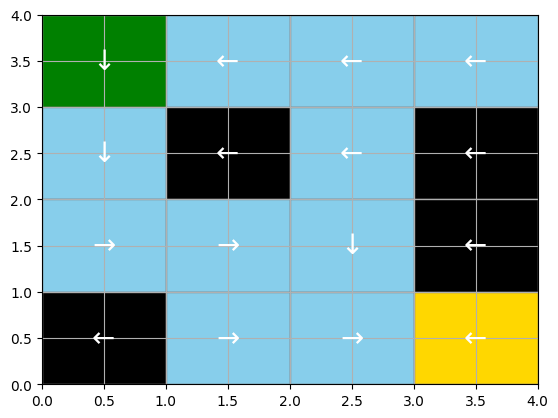

In [40]:
best_policy = np.argmax(qtable, axis=1)
plot_frozenlake(environment, policy=best_policy)


FrozenLake ortamındaki her bir durumun (state) ne kadar “değerli” olduğunu (öğrenilmiş Q-table verilerine göre) renkli bir ısı haritası (heatmap) olarak görselleştiriyor.

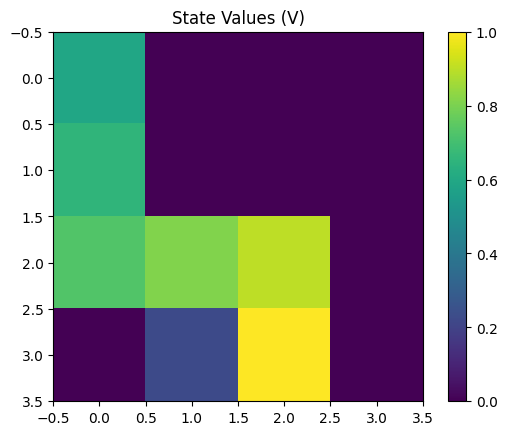

In [41]:
v_values = np.max(qtable, axis=1).reshape((4, 4))
plt.imshow(v_values, cmap='viridis')
plt.colorbar()
plt.title("State Values (V)")
plt.show()


# EVALUATİON

Bu kısım:
 * Eğitim sonrası, elde edilen Q-table’ın ne kadar iyi çalıştığını test eder.
 * 100 yeni denemede:
    * Q-table kullanarak “en iyi hareketi” seç.
    * Kaç defa hedefe ulaşıldığını say.


In [43]:
episodes = 100
nb_successes = 0

for episode in range(episodes):
    state = environment.reset()
    if isinstance(state, tuple):
        state = state[0]
    done = False

    while not done:
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])
        else:
            action = environment.action_space.sample()

        new_state, reward, done, info = environment.step(action)
        if isinstance(new_state, tuple):
            new_state = new_state[0]
        state = new_state

        if done and reward:
            nb_successes += 1

print(f"Number of successes: {nb_successes}/{episodes} ({100 * nb_successes / episodes:.2f}%)")


Number of successes: 1/100 (1.00%)
